In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Run before importing KMeans

import os
os.environ["OMP.NUM.THREADS"] = '1'

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


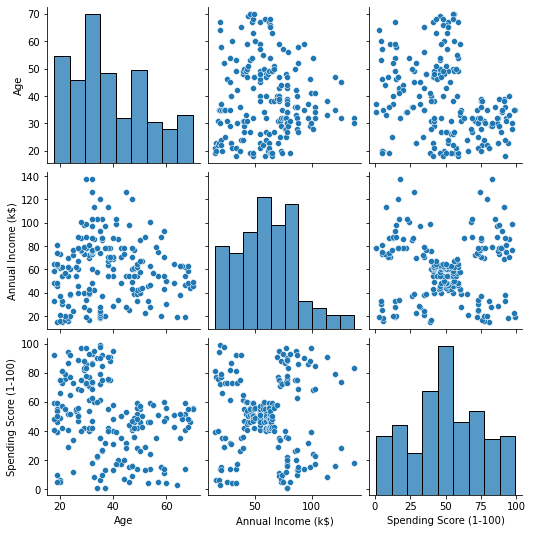

In [6]:
sns.pairplot(dataset.iloc[:,[2,3,4]])

In [9]:
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, [3,4]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

C:\Users\home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


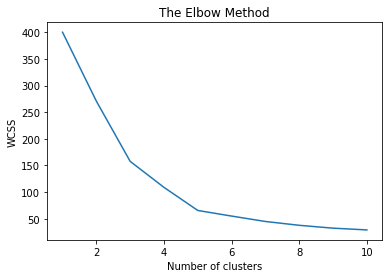

In [13]:
# using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

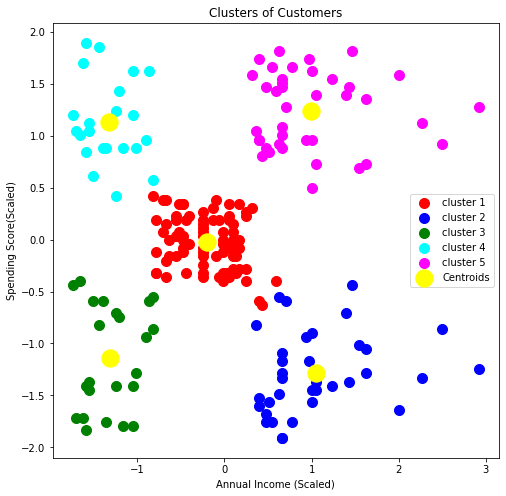

In [18]:
# Visualising the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend()
plt.show()

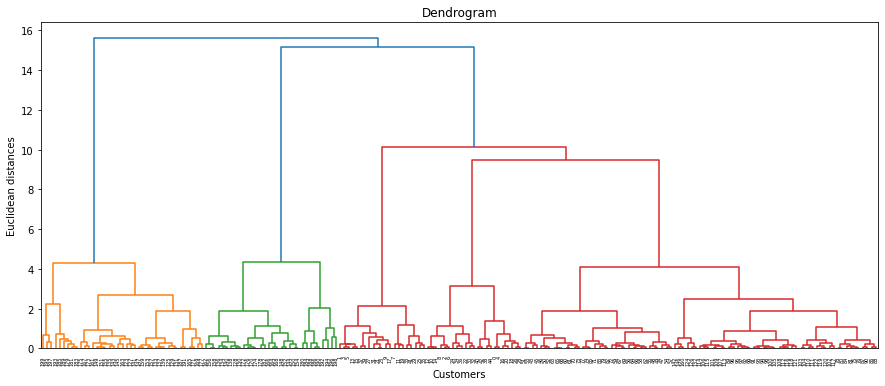

In [19]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

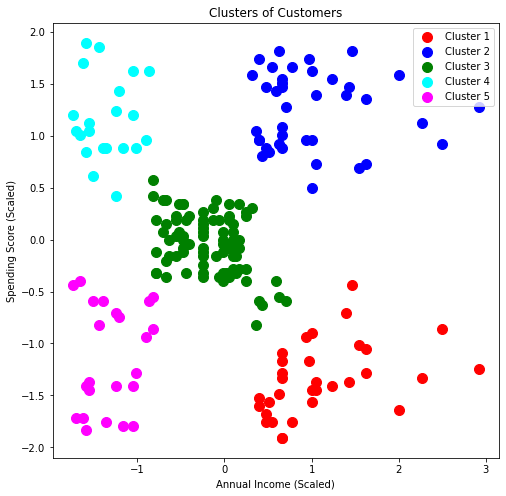

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()


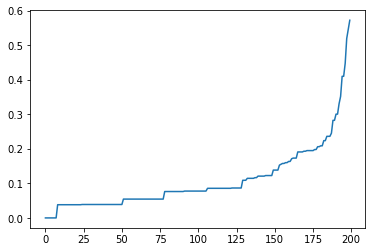

In [22]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

In [24]:
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

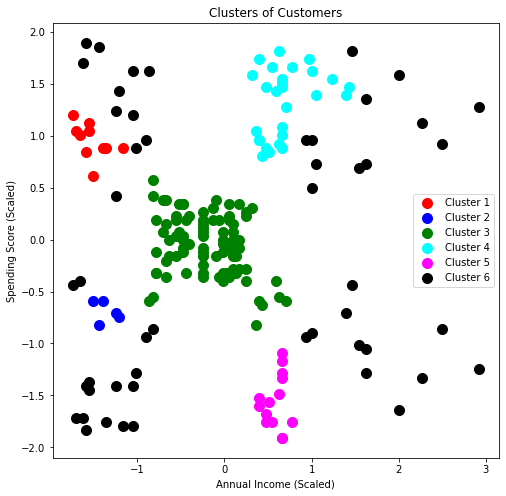

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

In [27]:
financials = pd.read_csv('costpercompany.csv')

In [28]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


In [29]:
financials.describe()

,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.402759,10.488966,172.448276,46.862069,4.906897,13024.517241,16.110345,1.173621
std,0.699065,3.564261,60.520709,28.265936,4.572428,9120.761558,18.885356,0.637931
min,0.750000,1.860000,49.000000,-49.800000,-2.200000,3300.000000,0.000000,-0.012000
25%,1.050000,9.200000,148.000000,51.500000,2.200000,6650.000000,0.000000,0.636000
50%,1.150000,10.580000,173.000000,56.000000,3.500000,9673.000000,8.300000,1.108000
75%,1.430000,12.200000,199.000000,60.000000,7.200000,15651.000000,26.700000,1.652000
max,3.900000,21.160000,370.000000,72.000000,16.400000,40008.000000,53.400000,2.610000


In [30]:
financials.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


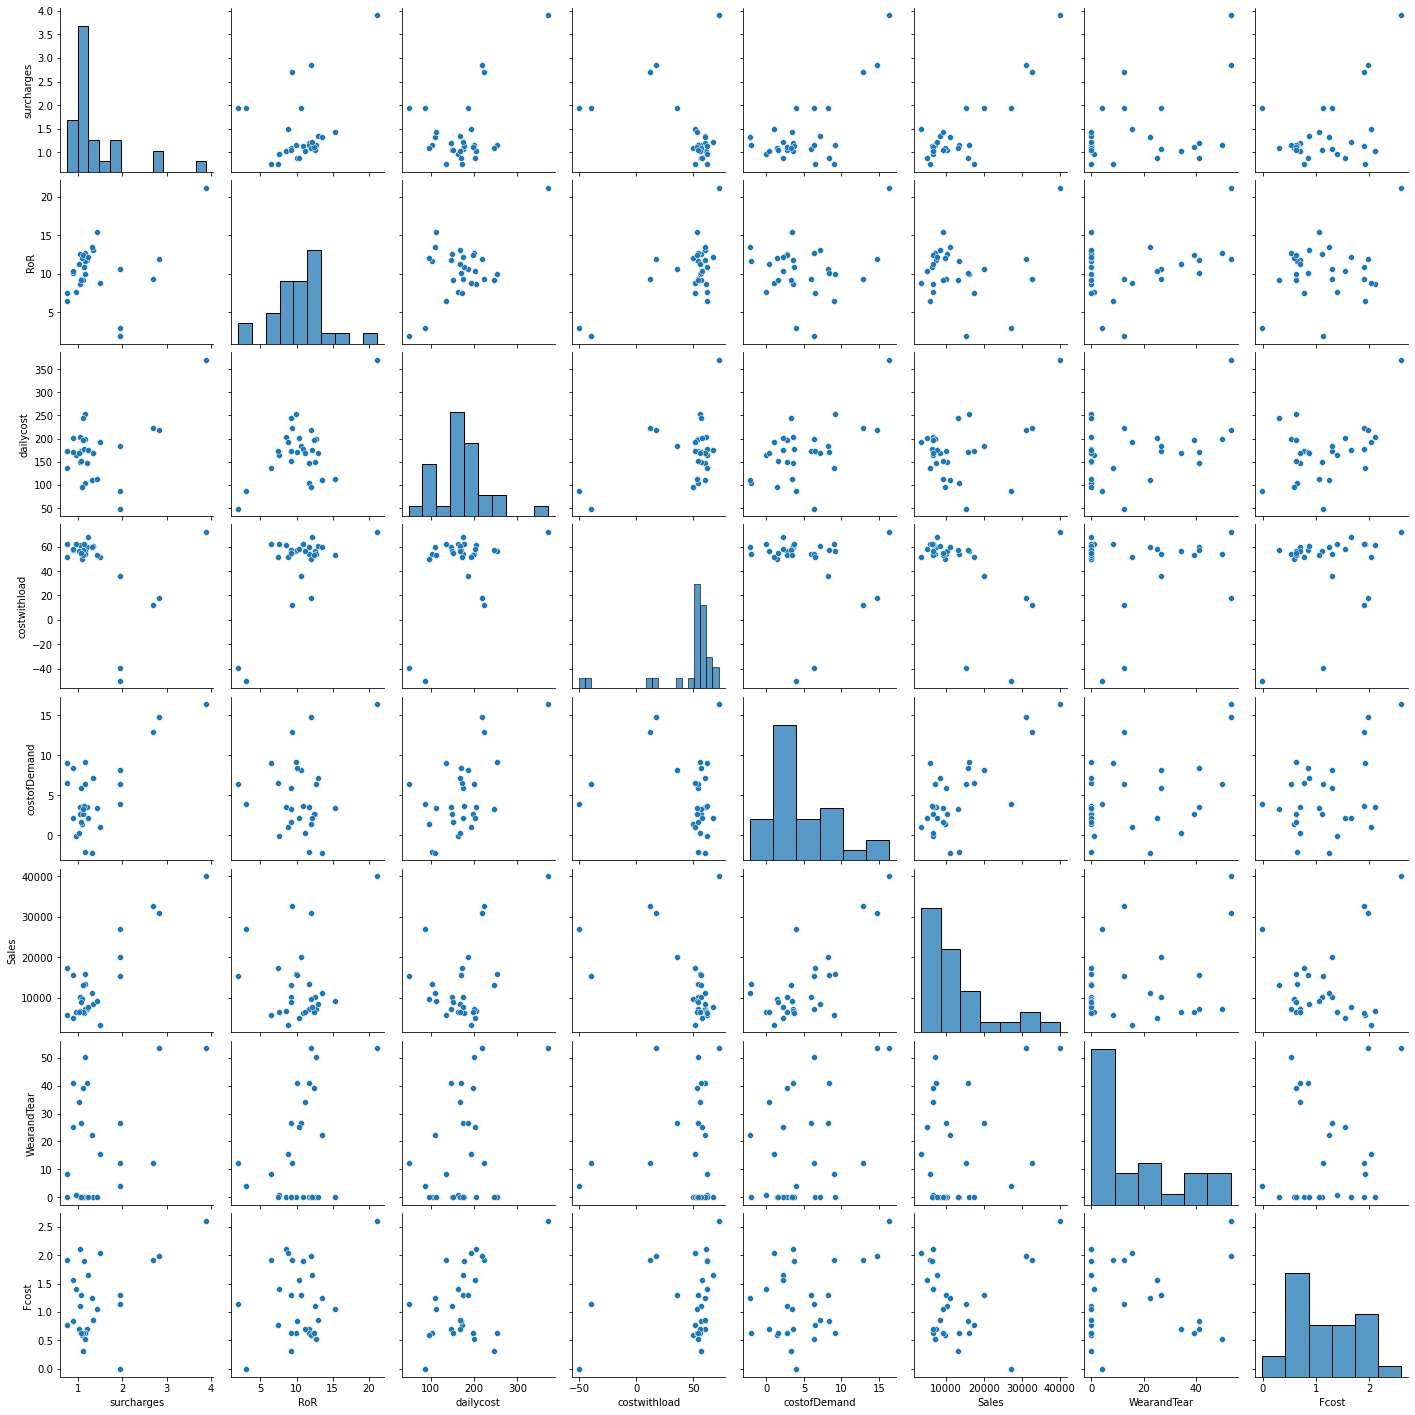

In [32]:
X = financials.iloc[:,1:9]

sns.pairplot(X)

In [34]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

C:\Users\home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


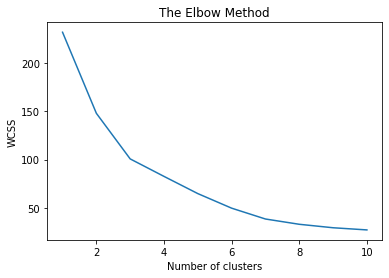

In [35]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [38]:
sum(pca.explained_variance_ratio_)

0.7056440181560044

In [44]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for 1 in range(3):
    plt.scatter(X.reduced[y_kmeans == i,0], X_reduced[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Cluster' +str(i+1))
plt.title('Clusters of Companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


SyntaxError: cannot assign to literal (Temp/ipykernel_10968/3399921455.py, line 4)